# Thông tin cá nhân:



*   Họ và tên: Lê Trọng Đại Trường
*   Mssv: 22521576






# Import Lib

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error

from IPython.display import display, HTML
from itertools import combinations_with_replacement
from sklearn.preprocessing import StandardScaler


# Load Data

In [3]:
def load_pkl(file_path):
  with open(file_path, 'rb') as file:
    data = pickle.load(file)
  return data

In [36]:
train_df = load_pkl('train_data.pkl')
test_df = load_pkl('test_data.pkl')

In [6]:
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,output
75220,0.910187,-0.831170,-0.226428,NaN,-0.875475,0.217134,1.222727,-0.512556,-0.047319,NaN,...,-1.146077,NaN,-0.134081,-0.702698,NaN,1.851776,0.144824,NaN,0.987155,-0.946181
48955,NaN,NaN,0.629110,NaN,0.470202,0.343496,NaN,-1.613149,-0.076462,0.107636,...,NaN,NaN,NaN,0.515115,1.333280,1.011613,1.626771,NaN,0.239772,14.133887
44966,0.348541,2.525876,NaN,NaN,-0.318007,-1.116323,NaN,NaN,1.239082,-1.363543,...,-1.668386,2.901917,0.283982,NaN,-0.188287,NaN,1.137473,-1.111602,NaN,-1.430724
13568,0.159977,NaN,1.553130,0.220560,0.482858,-0.199672,NaN,-1.239851,-0.262116,NaN,...,0.822290,NaN,-0.275694,1.053683,-0.437011,1.112376,NaN,NaN,NaN,4.648505
92727,NaN,-0.525681,1.186990,-0.381421,NaN,-1.239271,-0.258730,0.639371,-0.759816,-1.166033,...,NaN,1.800030,1.436179,1.833793,-0.343086,NaN,1.136335,0.462849,-1.600174,5.178535


# EDA

In [12]:
train_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,output
count,56054.000000,56022.000000,56054.000000,56039.000000,55997.000000,56025.000000,55921.000000,56002.000000,56162.000000,55966.000000,...,56021.000000,56064.000000,55940.000000,56085.000000,56080.000000,55864.000000,56021.000000,56117.000000,56018.000000,80000.000000
mean,0.003417,0.003507,-0.007777,-0.002284,0.004007,-0.002960,0.006616,0.002342,0.000481,-0.003760,...,-0.004280,-0.003770,-0.001205,-0.000409,-0.005168,-0.002213,0.002324,0.003763,0.010229,2.949868
std,0.999813,1.003594,0.999600,0.999555,0.996883,1.004879,1.003111,0.998860,0.998054,1.005091,...,1.003493,1.001635,1.009203,1.000726,1.003616,1.001498,0.997362,1.002123,0.998825,9.946372
min,-4.227232,-4.465604,-4.312973,-4.513469,-3.960696,-3.969358,-4.404214,-3.992446,-4.415184,-4.142430,...,-3.871217,-4.829436,-4.413886,-4.419923,-4.164295,-4.280225,-4.319465,-4.484079,-4.157734,-40.893258
25%,-0.671872,-0.672581,-0.681494,-0.677509,-0.666450,-0.681822,-0.668489,-0.670462,-0.677413,-0.683484,...,-0.681583,-0.679589,-0.675347,-0.670106,-0.679152,-0.675968,-0.669740,-0.670636,-0.667104,-3.727445
50%,0.003542,0.001857,-0.001674,-0.000011,0.009262,0.001647,0.007417,-0.000577,-0.000123,-0.007895,...,-0.007779,-0.008402,0.003721,-0.002402,-0.006058,-0.001925,0.001392,0.002770,0.020745,2.654494
75%,0.673402,0.680613,0.664572,0.671866,0.673356,0.677548,0.684097,0.676488,0.677830,0.674193,...,0.668814,0.671020,0.674545,0.670293,0.669368,0.677351,0.673944,0.677285,0.683596,9.266443
max,4.337424,3.758164,4.156753,4.479084,4.526784,3.995905,4.153257,4.365279,3.989945,4.289893,...,4.611257,3.765462,3.793137,4.005590,4.301546,4.065266,4.827623,4.386935,4.595828,65.813947


In [13]:
def EDA(df):
  df.describe()
  df.hist(figsize=(15, 10))

  nan_percentage = df.isna().sum() / len(df) * 100
  print("Null Percentage:")
  print(nan_percentage)
  target_column = 'output'
  correlations = df.corr()[target_column].drop(target_column)
  print("Correlation:")
  print(correlations)

Null Percentage:
feature_1     29.93250
feature_2     29.97250
feature_3     29.93250
feature_4     29.95125
feature_5     30.00375
feature_6     29.96875
feature_7     30.09875
feature_8     29.99750
feature_9     29.79750
feature_10    30.04250
feature_11    30.08625
feature_12    29.97375
feature_13    29.92000
feature_14    30.07500
feature_15    29.89375
feature_16    29.90000
feature_17    30.17000
feature_18    29.97375
feature_19    29.85375
feature_20    29.97750
output         0.00000
dtype: float64
Correlation:
feature_1    -0.401185
feature_2    -0.007659
feature_3     0.499075
feature_4    -0.005926
feature_5    -0.605885
feature_6     0.002240
feature_7    -0.001158
feature_8    -0.003285
feature_9     0.002774
feature_10    0.002227
feature_11    0.002371
feature_12    0.003703
feature_13   -0.002925
feature_14   -0.006015
feature_15   -0.005884
feature_16    0.002669
feature_17   -0.007216
feature_18    0.000528
feature_19   -0.004789
feature_20   -0.002296
Name: output

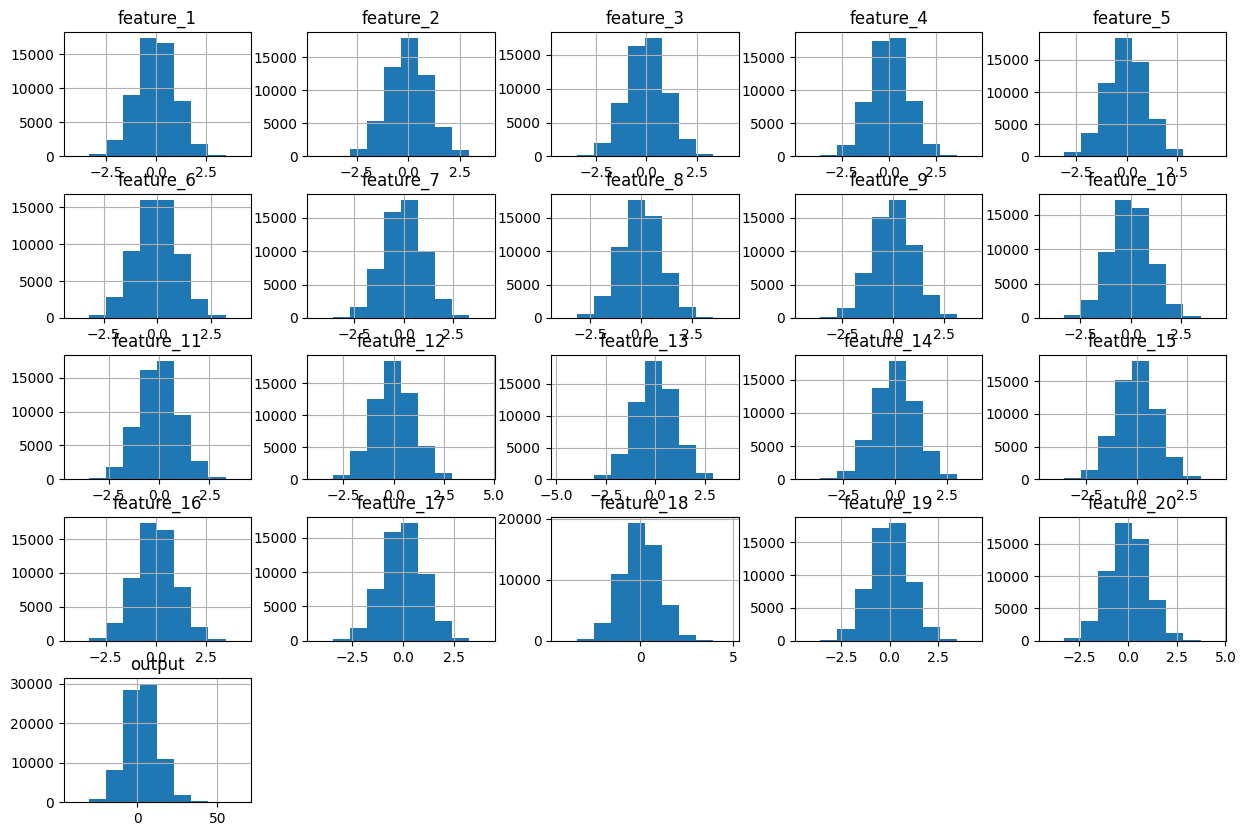

In [14]:
EDA(train_df)

# Fill NaN

In [16]:
def fill_na(df):
  df.fillna(df.mean(), inplace=True)
  # df.fillna(df.mode(), inplace=True)
  # df.fillna(df.median(), inplace=True)
  return df

In [61]:
train_df = fill_na(train_df)
test_df = fill_na(test_df)

In [18]:
train_df.isna().sum()

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
feature_6,0
feature_7,0
feature_8,0
feature_9,0
feature_10,0


# Train-Test Split

In [44]:
X = train_df.drop('output', axis=1)
y = train_df['output']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
X_true_test = test_df.drop('output', axis=1)
y_true_test = test_df['output']

# Feature Engineering

In [46]:
def plot_correlation_matrix(df, train=True):
    plt.figure(figsize=(15, 8))
    sns.heatmap(
        df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True
    )
    title = "Correlation Matrix of Training Dataset" if train else "Correlation Matrix of Testing Dataset"
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    return df.corr()

def drop_high_correlation_features(df, threshold):
    upper_matrix = df.corr().where(np.triu(np.ones(df.corr().shape), k=1).astype(bool))
    dropped_features = [col for col in upper_matrix.columns if any(upper_matrix[col] > threshold)]
    return df.drop(dropped_features, axis=1)


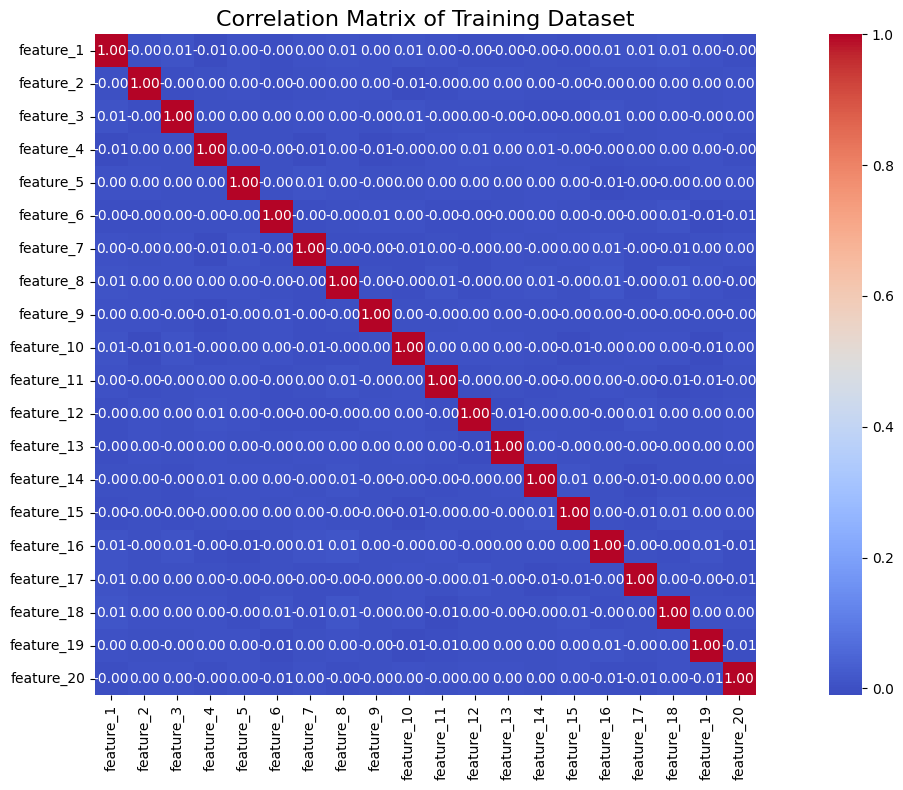

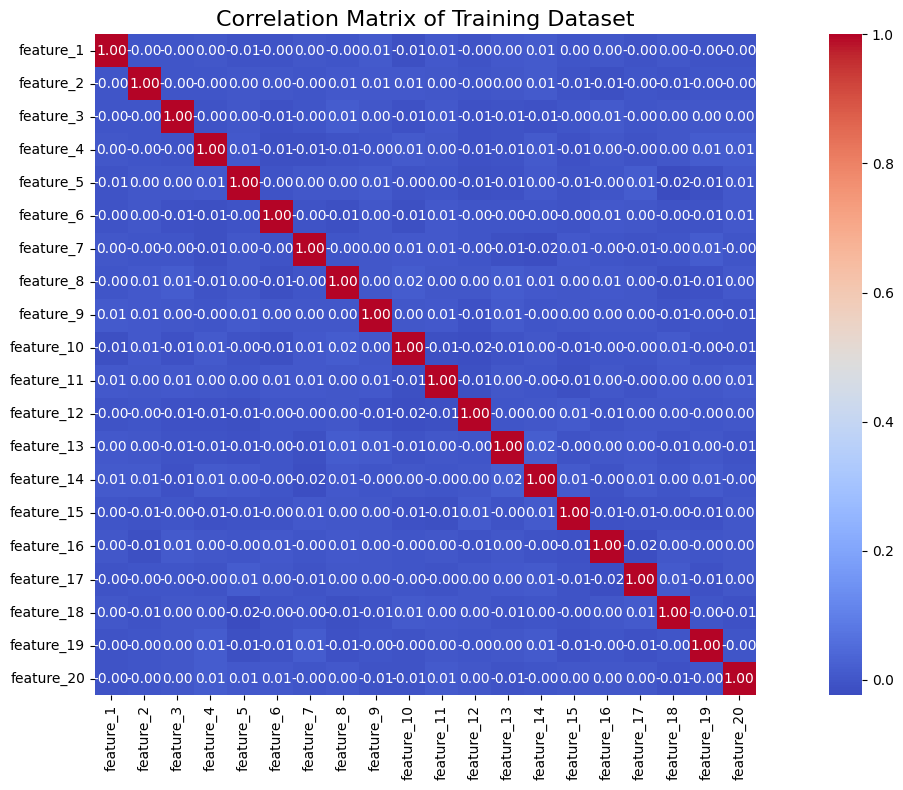

In [51]:
train_correlation_matrix = plot_correlation_matrix(X_train)
X_train = drop_high_correlation_features(X_train, 0.8)

test_correlation_matrix = plot_correlation_matrix(X_test)
X_test = drop_high_correlation_features(X_test, 0.8)


## Feature Fusing

In [31]:
def fuse_features(X_features):
  # Generate combinations of features (with replacement)
  feature_pairs = list(combinations_with_replacement(X_features.columns, 2))

  # Create a dictionary to store new features
  new_features = {
      f"feature_{i}": X_features[feature_first] * X_features[feature_second]
      for i, (feature_first, feature_second) in enumerate(feature_pairs, start=len(X_features.columns))
  }

  # Concatenate all new features into a single DataFrame
  X_new = pd.concat(new_features, axis=1)

  # Combine original features with new features
  X_combined = pd.concat([X_features, X_new], axis=1)

  return X_combined

In [52]:
def fuse_features(X_features):

    from itertools import combinations_with_replacement

    # Generate combinations of features (with replacement)
    feature_pairs = combinations_with_replacement(X_features.columns, 2)

    # Create new features by multiplying each pair of features
    X_new = pd.DataFrame({
        f"{f1}_x_{f2}": X_features[f1] * X_features[f2]
        for f1, f2 in feature_pairs
    }, index=X_features.index)

    # Combine original features with the new features
    return pd.concat([X_features, X_new], axis=1)


In [76]:
X_fused_train = fuse_features(X_train)
X_fused_test = fuse_features(X_test)
X_fused_true_test = fuse_features(X_true_test)

## Removing Features with Lasso

In [77]:
def remove_low_weight_features(X_features, y, selected_cols=None, threshold=0.01, alpha=0.01):

    selected_cols = selected_cols or X_features.columns.tolist()

    # Train Lasso model and get weights
    lasso = Lasso(alpha=alpha, max_iter=1000).fit(X_features, y)
    weights = lasso.coef_

    # Filter features based on weight threshold
    selected_cols = [col for col, weight in zip(X_features.columns, weights) if abs(weight) > threshold]

    return X_features[selected_cols], selected_cols


In [78]:
X_removed_train, selected_cols = remove_low_weight_features(X_fused_train, y_train, threshold=0.01)
X_removed_test = X_fused_test[selected_cols]
X_removed_true_test = X_fused_true_test[selected_cols]

In [79]:
print(f'Seleted Features: {selected_cols}')
print(f'Number of Selected Features: {len(selected_cols)}')

Seleted Features: ['feature_1', 'feature_2', 'feature_3', 'feature_5', 'feature_8', 'feature_9', 'feature_11', 'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_1_x_feature_2', 'feature_1_x_feature_5', 'feature_1_x_feature_10', 'feature_1_x_feature_15', 'feature_1_x_feature_20', 'feature_2_x_feature_2', 'feature_2_x_feature_4', 'feature_2_x_feature_8', 'feature_2_x_feature_12', 'feature_2_x_feature_13', 'feature_2_x_feature_15', 'feature_2_x_feature_16', 'feature_2_x_feature_18', 'feature_2_x_feature_19', 'feature_3_x_feature_3', 'feature_3_x_feature_7', 'feature_3_x_feature_11', 'feature_3_x_feature_16', 'feature_4_x_feature_4', 'feature_4_x_feature_8', 'feature_4_x_feature_9', 'feature_4_x_feature_11', 'feature_4_x_feature_12', 'feature_4_x_feature_18', 'feature_5_x_feature_8', 'feature_5_x_feature_14', 'feature_5_x_feature_20', 'feature_6_x_feature_6', 'feature_6_x_feature_7', 'feature_6_x_feature_14', 'feature_6_x_feature_15', 'feature_6_x

# Inferences

In [82]:
model = xgb.XGBRegressor(objective='reg:absoluteerror',n_estimators=100, learning_rate=0.05, random_state=42)
model.fit(X_removed_train, y_train)
y_pred_train = model.predict(X_removed_test)
mae = mean_absolute_error(y_test, y_pred_train)
print(f"Mean Absolute Error on Train: {mae}")

Mean Absolute Error on Train: 3.9069961476861574


In [83]:
y_pred_test = model.predict(X_removed_true_test)
mae = mean_absolute_error(y_true_test, y_pred_test)
print(f"Mean Absolute Error on Train: {mae}")

Mean Absolute Error on Train: 3.931008078188845
